<h1 align="center"> LAB 3_Exercise 2-3 </h1>  

## IMPORT

In [48]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
from numpy.linalg import solve
%matplotlib inline

### SURFACE PLOT 3D + CONTOUR PLOT 

In [49]:
def plot3d(X,Y,Z,a=20,b=10, c=100):
    fig = plt.figure(figsize=(a,b))
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    ax.contour(X,Y,Z,30,zdir='z',offset=0)
    plt.contour(X,Y,Z, c)
    
def plot2d(X,Y,Z,a=20,b=10, c=100):
    plt.figure(figsize=(a,b))
    plt.contour(X, Y, Z, c)
    plt.streamplot(X, Y, gradx, grady)

### GRADIENT DESCENT METHOD

In [50]:
def gradientDescent(ptx=1,pty=1,a = 1):
    
    plot2d(X,Y,Z)
    alpha = a
    pt = [ptx,pty]   # initial point
    aux = pt[:]
    listax, listay = [pt[0]], [pt[1]]   
    iter = 0
    step_reduction = 0

    print "Feel free to play around and change the initial point and/or the step\n"
    print "Initial point: %s" %pt
    while alpha>10**(-5) and abs(f(pt[0]-alpha*df_X(pt[0],pt[1]),pt[1]-alpha*df_Y(pt[0],pt[1]))-f(pt[0],pt[1]))>10**(-10):  

        # backtracking algorithm to compute a good value for alpha
        df = [df_X(pt[0],pt[1]), df_Y(pt[0],pt[1])] 
        if f(pt[0]- alpha * df[0], pt[1]- alpha * df[1])> f(pt[0],pt[1]):
            alpha = alpha/2. 
            step_reduction +=1
        else:
            iter +=1
            plt.plot(pt[0],pt[1],'ro')
            #print " We have used the gradient descent at the point (%0.4f,%0.4f) with step %0.4f" %(pt[0],pt[1], alpha)
            aux[0] += -alpha * df[0]
            aux[1] += -alpha * df[1]
            pt = aux[:]
            alpha = 1
            listax.append(pt[0])
            listay.append(pt[1])  

    print "   Step reductions: %s \n   Steps by Gradient descent method:%s \n   Total iteration:%s"  %(step_reduction, iter, step_reduction+iter)
    print "Minimum point found: %s" %pt
    plt.plot(listax,listay,'k')
    plt.show()

### NEWTON METHOD + GRADIENT DESCENT

If the Hessian is positive definite, use the Newton method to perform the descent. Otherwise, use the gradient descent to perform the descent. 

If the Hessian is positive definite at x, then f attains a local minimum at x. If the Hessian is negative definite at x, then f attains a local maximum at x. If the Hessian has both positive and negative eigenvalues then x is a saddle point for f. Otherwise the test is inconclusive. In two variables, the determinant can be used, because the determinant is the product of the eigenvalues. If it is positive then the eigenvalues are both positive, or both negative. If it is negative then the two eigenvalues have different signs. If it is zero, then the second derivative test is inconclusive. 

In [51]:
def newtonGrad(ptx=-1, pty=-2, a=1):
    
    plot2d(X,Y,Z)
    alpha = a
    pt = [ptx,pty]   # initial point
    aux = pt[:]      # a copy of the initial point
    listax, listay = [pt[0]], [pt[1]]   
    step_reduction = 0
    iter_newton = 0
    iter_grad = 0

    print "Feel free to play around and change the initial point and/or the step\n"
    print "Initial point: %s" %pt
    while alpha>10**(-5) and abs(f(pt[0]-alpha*df_X(pt[0],pt[1]),pt[1]-alpha*df_Y(pt[0],pt[1]))-f(pt[0],pt[1]))>10**(-5):  
        df = [df_X(pt[0],pt[1]), df_Y(pt[0],pt[1])] 
        H = hessian(pt[0],pt[1])
        d = det(H)
 
        # If the Hessian is positive definite, use the Newton method to perform the descent. 
        if d>0 and H[0][0] > 0:    
            direction = np.dot(inv(H),df)  # direction = np.linalg.solve(H,df)
            aux[0] = pt[0] -alpha * direction[0]
            aux[1] = pt[1] -alpha * direction[1]                   
            
            # backtracking algorithm to compute a good value for alpha
            if f(aux[0], aux[1])> f(pt[0],pt[1]):
                alpha = alpha/2.  
                step_reduction +=1
            else:
                iter_newton +=1
                plt.plot(pt[0],pt[1],'go')
                pt=aux[:]
                alpha = 1
            
        # Otherwise, use the gradient descent to perform the descent.    
        else:  
            aux[0] = pt[0] -alpha * df[0]
            aux[1] = pt[1] -alpha * df[1]

            # backtracking algorithm to compute a good value for alpha
            if f(aux[0], aux[1])> f(pt[0],pt[1]):
                alpha = alpha/2.  
                step_reduction +=1
            else:
                iter_grad +=1
                plt.plot(pt[0],pt[1],'ro')
                pt=aux[:]
                alpha = 1
    
        listax.append(pt[0])
        listay.append(pt[1])

    print "    Step reductions: %s \n    Steps by Newton method: %s \n    Steps by Gradient descent method:%s "  %(step_reduction, iter_newton, iter_grad) 
    print "    Total iterations: %s" %(step_reduction+iter_newton+iter_grad)
    print "Minimum point found: %s" %pt
    plt.plot(listax,listay,'k')
    plt.show()

## Exercise 2

$$       f(x_1,x_2) = x^2_1 (4- 2.1x^2_1+\frac{1}{3}x^4_1)+x_1x_2+x^2_2(-4+4x^2_2)  $$

In [60]:
X, Y = np.arange(-2, 2, 0.1),np.arange(-1.2, 1.2, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.multiply(X**2,(4-2.1* X**2 + (1./3)*X**4)) + np.multiply(X,Y)+ np.multiply((Y**2),(-4+4*Y**2))

# Compute gradient
gradx = 8*X-8.4*(X**3)+2*(X**5)+Y
grady = X - 8*Y + 16*(Y**3)
# define functions

def f(X,Y):
    return (X**2)*(4-2.1* X**2 + (1./3)*X**4) + X*Y + (Y**2)*(-4+4*Y**2)

def df_X(X,Y): 
    return 8*X-8.4*(X**3)+2*(X**5)+Y

def df_Y(X,Y):
    return X-8*Y+16*(Y**3)

def hessian (X,Y): 
    DD_XX = 8-25.2*X**2+10*X**4  
    DD_YY = 48*Y**2-8
    DD_XY, DD_YX = 1,1
    H = np.array([[DD_XX, DD_XY], [DD_YX, DD_YY]])
    return H

def det (H):
    return H[0][0]*H[1][1]-H[0][1]*H[1][0]

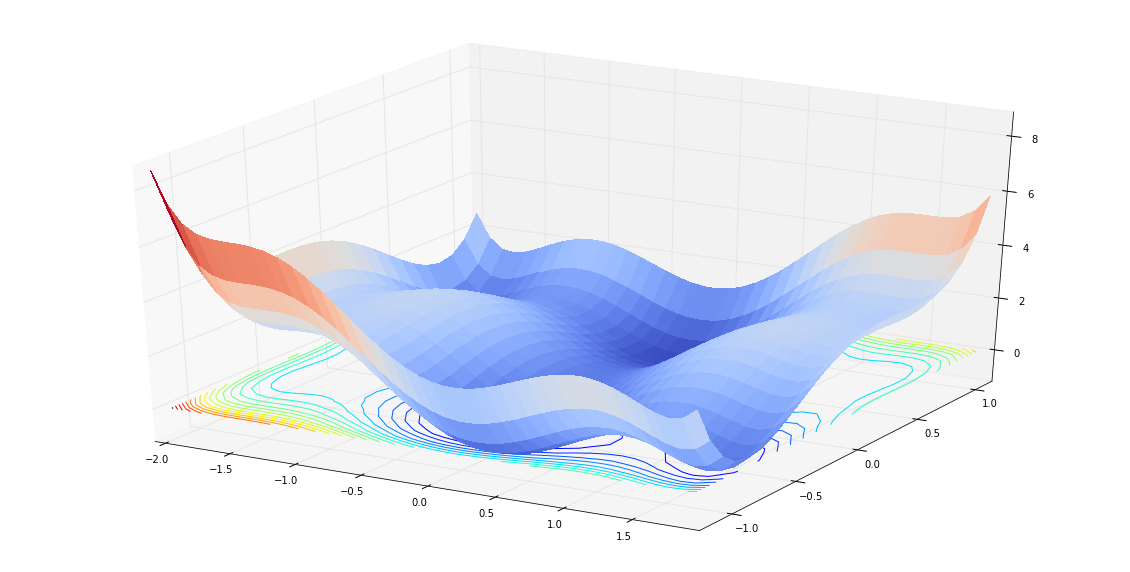

In [53]:
plot3d(X,Y,Z)

Feel free to play around and change the initial point and/or the step

Initial point: [-0.8, -1]
   Step reductions: 32 
   Steps by Gradient descent method:11 
   Total iteration:43
Minimum point found: [-0.0898427130144786, 0.7126533161570622]


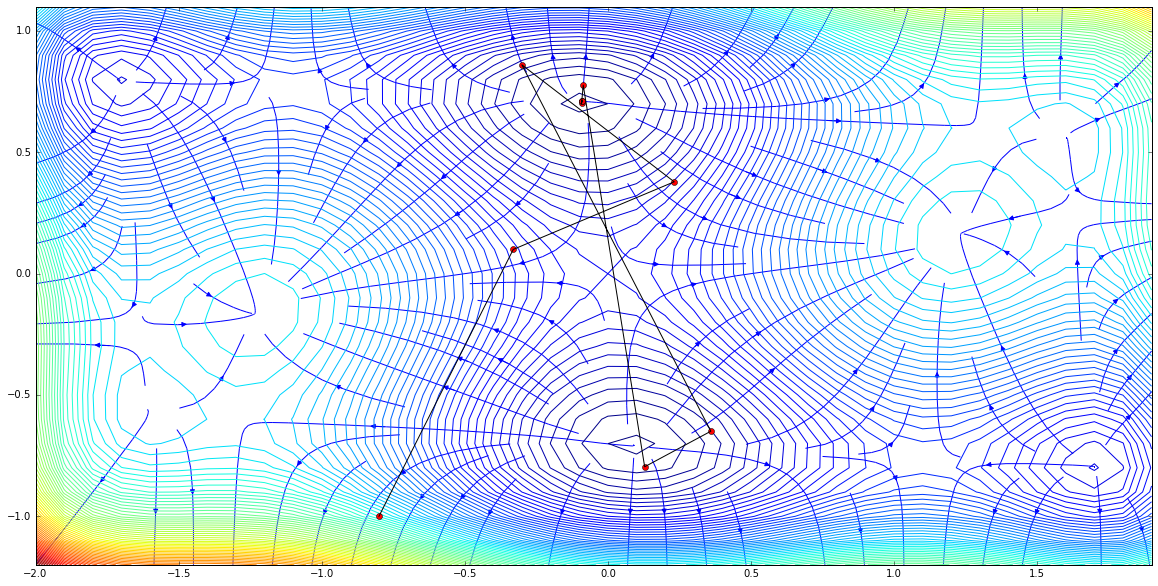

In [54]:
gradientDescent(-0.8,-1)

Feel free to play around and change the initial point and/or the step

Initial point: [-0.8, -1]
    Step reductions: 7 
    Steps by Newton method: 3 
    Steps by Gradient descent method:3 
    Total iterations: 13
Minimum point found: [-0.089842765351979201, 0.71266228090102457]


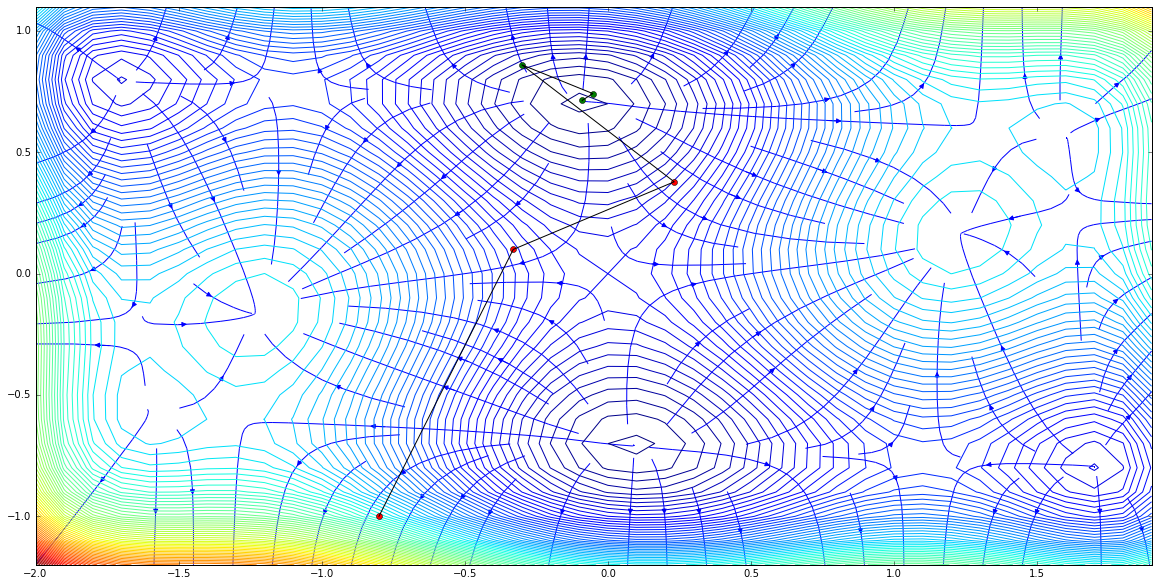

In [55]:
newtonGrad(-0.8,-1)

## Exercise 3: The Rosenbrock function

$$ f(x_1,x_2)=(a-x_1)^2+b(x_2-x_1^2)^2   $$

In [62]:
a, b =1, 100
X = np.arange(-3, 3, 0.1)
Y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(X, Y)
Z = (a-X)**2+b*(Y-(X**2))**2

# Compute gradient 
gradx = -2*a + 2*X-4*b*X*Y +4*b*X**3
grady = 2*b*Y - 2*b*X**2

# define functions
def df_X(X,Y):
    return -2 *(a-X)-4*b*(Y-X**2)*X

def df_Y(X,Y):
    return 2*b*Y - 2*b*X**2

def f(X,Y):
    return (a-X)**2+b*(Y-(X**2))**2

def hessian (X,Y): 
    DD_XX =  2-4*b*Y+12*b*X**2 
    DD_XY = -4*b*X
    DD_YY = 2*b
    DD_YX = -4*b*X
    H = np.array([[DD_XX, DD_XY], [DD_YX, DD_YY]])
    return H

def det (H):
    return H[0][0]*H[1][1]-H[0][1]*H[1][0]

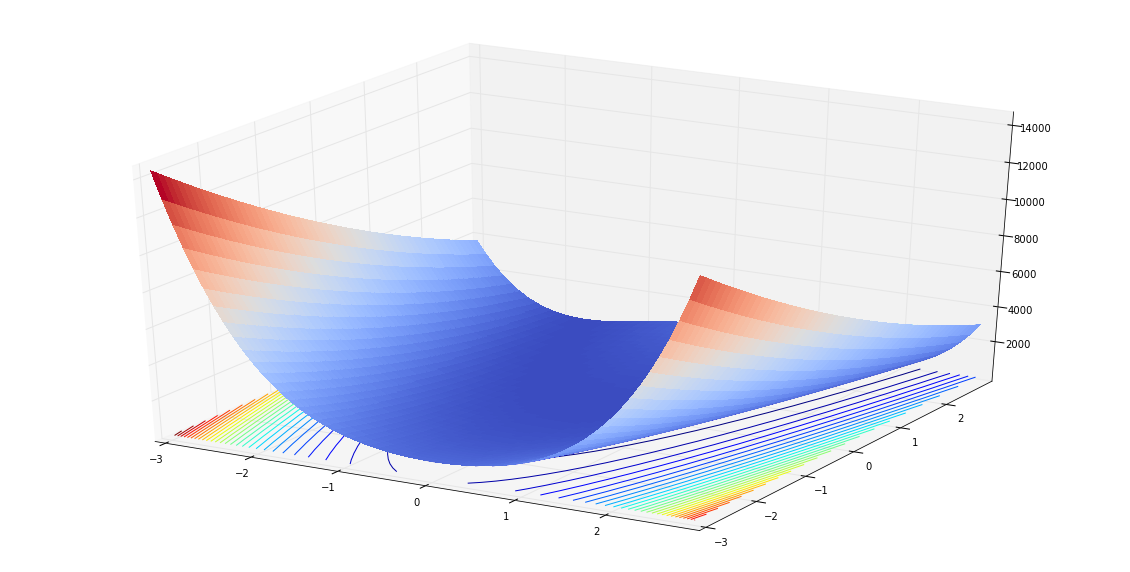

In [63]:
plot3d(X,Y,Z)

Feel free to play around and change the initial point and/or the step

Initial point: [-1.5, -2]
   Step reductions: 19982 
   Steps by Gradient descent method:2239 
   Total iteration:22221
Minimum point found: [0.9951333280007614, 0.990260693606322]


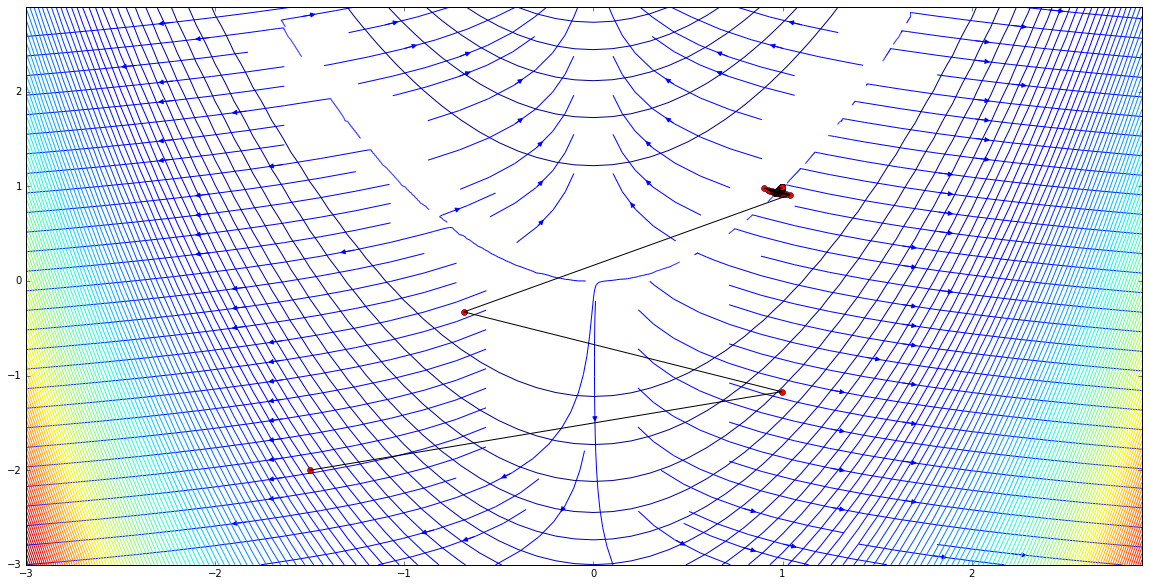

In [58]:
gradientDescent(-1.5,-2)

Feel free to play around and change the initial point and/or the step

Initial point: [-1.5, -2]
    Step reductions: 8 
    Steps by Newton method: 21 
    Steps by Gradient descent method:0 
    Total iterations: 29
Minimum point found: [0.99999610496283464, 0.99999218765081255]


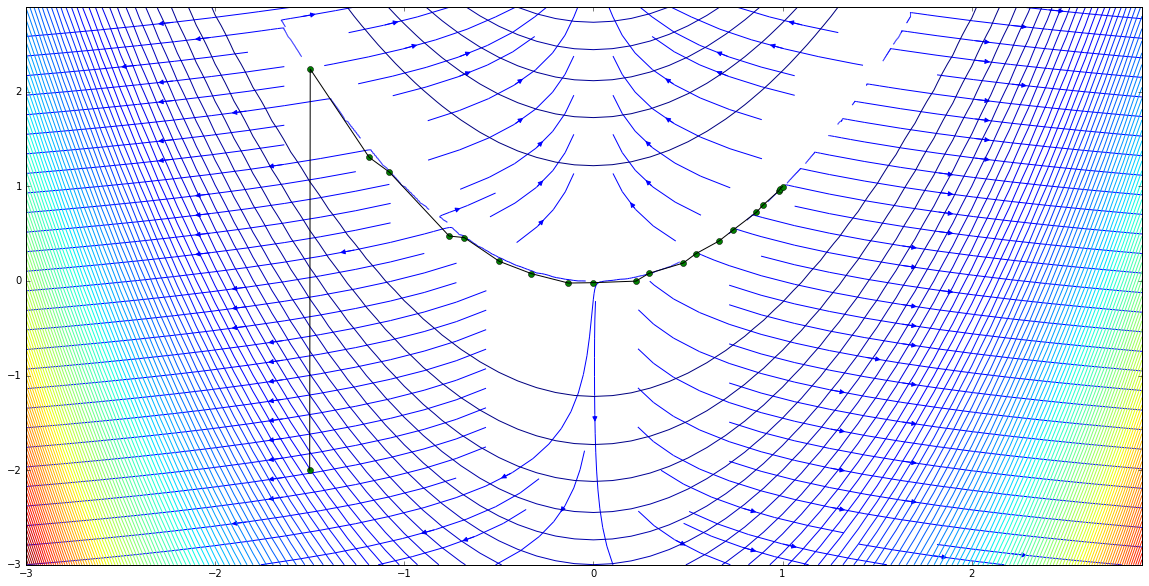

In [59]:
newtonGrad(-1.5,-2)

## NOTE: 
The Newton method requires, in general, less iterations than the gradient descent to arrive to the minimum. But the disadvantage of the Newton method is that it requires solving the linear system of equations $$ ∇^2f(x^k)d^k =−∇f(x^k)$$ and thus it requires higher computational effort. In addition, one needs to know if the Hessian matrix if positive definite in order to be sure that the vector $d^k$ is a descent direction. There are methods that tackle the previous computational issues, namely the conjugate gradient descent algorithm. In any case, take into account that the Newton method has great advantages over the gradient descent method. But this does not necessarily mean that the Newton method is always better than the gradient descent. In some cases the gradient descent may be good enough for the problem to be solved.

## Final comments:

<b>Exercise2</b>: The gradient descent (with backtracking) is good enough. Newton method requires fewer steps, but the diference is not significant. 

<b>Exercise3 (Rosenbrock function)</b>: The global minimum is inside a long, narrow, parabolic shaped valley. It requires a lot of iterations of the gradient descent in order to arrive to the minimum. This is due to the fact that during iterations the gradient descent continuously jumps from one side to the other side of the valley without taking into account the shape of the valley. With Newton method, we were able to reduce huge amount of iterations.

Let us compare the results. Taking the initial point (-1.5, -2), 

   <b>gradient descent method:</b>
    - Step reductions: 19982
    - Steps by Gradient descent method:2239 
    - Total iteration:22221
    - Minimum point found: [0.9951333280007614, 0.990260693606322]

   <b>Newton method:</b>   
    - Step reductions: 8 
    - Steps by Newton method: 21
    - Steps by Gradient descent method:0 
    - Total iterations: 29
    - Minimum point found: [0.99999610496283464, 0.99999218765081255]